# 第一次作业
## 姓名：何永明
## 学号：1841220112

# 一、主成分分析

$\quad$主成分分析也称主分量分析。由于多个变量之间往往存在着一定程度的向光性。人们自然希望通过线性组合的方式，从这些指标中尽可能快地提取信息。当地一个线性组合不能提取更多的信息时，再考虑第二个线性组合继续这个快速提取的过程，……直到所提取的信息与原指标相差不多时为止。这就是主成分分析的思想。一般来说，在主成分分析适用的场合，用较少的主成分就可以得到较多的信息量。以各个主成分为分量，就得到一个更低维的随机向量；因此，通过主成分既可以降低数据“维数”，又保留了原数据的大部分信息。

# 二、主成分的几何意义

$\quad$主成分分析数学模型中的正交变换，在几何上就是作一个坐标旋转。因此，主成分分析在二维空间中有明显的几何意义。假设共有n个样品，每个样品都测量了两个指标$(X_1,X_2)$,它们大致分布在一个椭圆内,如图所示。事实上，散点的分布总有可能沿着某一个方向略显扩张，这个方向就把它看作椭圆的长轴方向。显然，在坐标系$x_1Ox_2$中，单独看这个n个点的分量$X_1$和$X_2$，它们沿着$x_1$方向和$x_2$方向都具有较大的离散性，其离散的程度可以分别用$X_1$的方差和$X_2$的方差测定。如果仅考虑$X_1$或$X_2$中的任何一个分量，那么包含在另一分量中的信息将会损失，因此，直接舍去某个分量不是“降维”的有效办法。
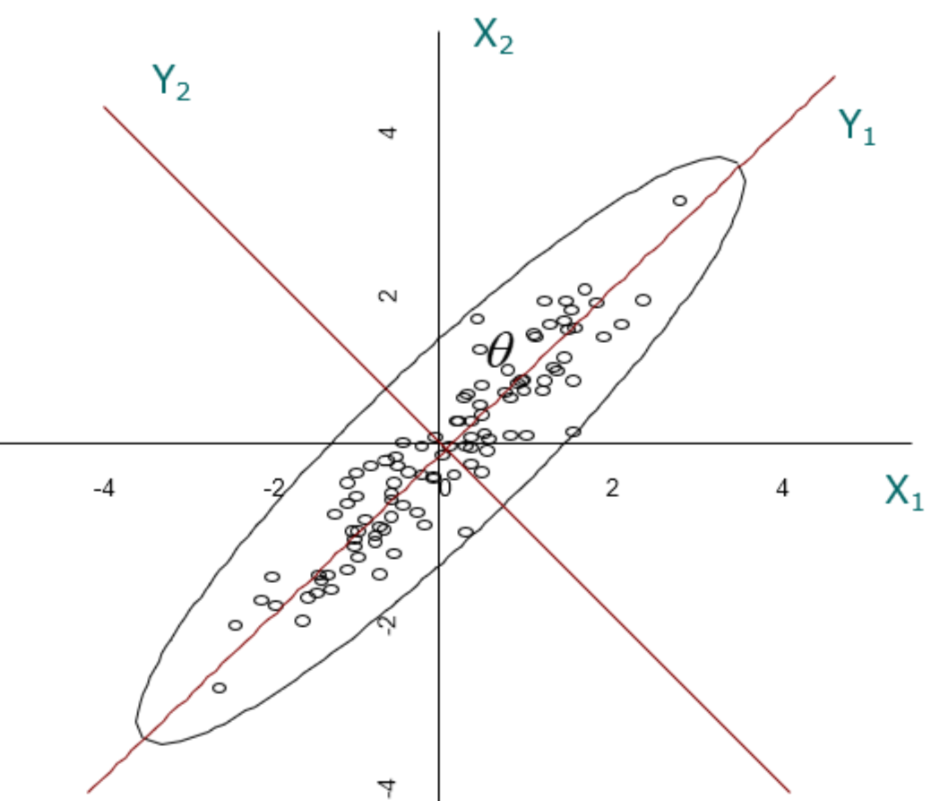

$\quad$如果我们将该坐标系按逆时针方向旋转某个角度$\theta$变成新坐标系$y_1Oy_2$，这里$y_1$是椭圆的长轴方向，$y_2$是椭圆的短轴方向。旋转公式为$$ \begin{cases}
Y_1=X_1cos\theta+X_2sin\theta\\
Y_2=-X_1sin\theta+X_2cos\theta \end{cases}$$

$\quad$我们看到新变量$Y_1$和$Y_2$是原变量$X_1$和$X_2$的线性组合，它的矩阵表现形式为
$${Y_1 \choose Y_2}={cos\theta\quad sin\theta \choose -sin\theta\quad cos\theta}{X_1 \choose X_2}=T'X$$

$\quad$其中，$T'$为旋转变换矩阵，它是正交矩阵，即有$T'=T^{-1}$或$T'T=I$。易见，n个点在新坐标系下的坐标$Y_1$和$Y_2$几乎不相关。称它们为原始变量$X_1$和$X_2$的综合变量，n个点在$y_1$轴上的方差达到最大，即在此方向上包含了有关n个样品的最大量信息。因此，欲将二维空间的点投影到某个一维方向上，则选择$y_1$轴方向能使信息的损失最小。我们称$Y_1$为第一主成分，称$Y_2$为第二主成分。第一主成分的效果与椭圆的形状有很大的关系，椭圆越是扁平，n个点在$y_1$轴上的方差就相对越大，在$y_2$轴上的方差就相对越小，用第一主成分代替所有样本所造成的信息损失也就越小。考虑两种极端的情形：一种是椭圆的长轴与短轴相等，即椭圆变成圆，第一主成分只含有二维空间点的约一半信息，若仅用这一个综合变量，则将损失约50%的信息，这显然是不可取的。造成它的原因是，原始变量$X_1$和$X_2$的相关程度几乎为零，也就是说，它们所包含的信息几乎不重叠，因此无法用一个一维的综合变量来代替。另一种是椭圆扁平到了极限，变成$y_1$轴上的一条线，第一主成分包含有二维空间点的全部信息，仅用这一个综合变量代替原始数据不会有任何的信息损失，此时的主成分分析效果是非常理想的，其原因是，第二主成分不包含任何信息，舍弃它当然没有信息损失。

# 三、代码（探究用户对物品类别的喜好细分降维）

In [16]:
import pandas as pd
from sklearn.decomposition import PCA

# 1、获取数据集
# Fields：aisle_id, aisle     
products = pd.read_csv("./instacart/products.csv")
order_products = pd.read_csv("./instacart/order_products__prior.csv")
orders = pd.read_csv("./instacart/orders.csv")
aisles = pd.read_csv("./instacart/aisles.csv")

# 2、合并表，将user_id和aisle放在一张表上
# 1）合并orders和order_products on=order_id tab1:order_id, product_id, user_id
tab1 = pd.merge(orders, order_products, on=["order_id", "order_id"])
# 2）合并tab1和products on=product_id tab2:aisle_id
tab2 = pd.merge(tab1, products, on=["product_id", "product_id"])
# 3）合并tab2和aisles on=aisle_id tab3:user_id, aisle
tab3 = pd.merge(tab2, aisles, on=["aisle_id", "aisle_id"])

# 3、交叉表处理，把user_id和aisle进行分组
table = pd.crosstab(tab3["user_id"], tab3["aisle"])

# 4、主成分分析的方法进行降维
# 1）实例化一个转换器类PCA并保留95%信息
transfer = PCA(n_components=0.95)
# 2）fit_transform
data = transfer.fit_transform(table)

data.shape
print(data.shape)

(206209, 44)
